# Project: TMDB Data Analysis

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#daprocess">Data Analysis Process</a></li>
<ul>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
</ul>
<li><a href="#explore">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#conclusions">Conclusion</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset contains information about 10,000 movies collected from The Movie Database (TMDb). It is a collection of movies released between 1960 to 2015 with varying information such as the movie names, popularity of the movie, budget, revenue, cast, director and other information that will be used to gather insights.

This dataset will be analyzing the data associated with movies in the TMDB dataset. It will be used to identify the underlying trends and features that contribute to a profitable movie.


<a id='daprocess'></a>
## Data Analysis Process
The data analysis techniques that will be used for the purpose of this dataset are: Asking of questions, Data wrangling, Exploratory Data Analysis and Communicating Results using visuals. The libraries that will be used for the data exploration are Pandas, Numpy and Matplotlib.

<a id='questions'></a>
### Questions
The dataset will be answering the following questions:
>1. How many movies were released each year?
>2. What month has the highest number of movie release?
>3. What are the most popular genre of movies?
>4. Who are the most featured actors in a movie?
>5. Who are the Top 10 directors with the highest number of movies released?
>6. Top 10 production companies by number of movies produced?
>7. Top 15 most popular movies?
>8. Does the release year of a movie determine it's popularity?
>9. What month has the highest number of popular movies released?
>10. What movies are the most voted?
>11. What feature makes the movies most voted?
>12. What are the top 10 high-budget movies?
>13. What are the top 15 most profitable movies?
>14. How much profit was generated yearly against the budget?
>15. Over the years what month generated the most profit?
>16. What movies have the longest runtime?

<a id='wrangling'></a>
### Data Wrangling
This is the process of gathering your data, assessing the quality of the data and cleaning the data before analyzing and visualizing your data. For the purpose of the TMDB data we will be assessing the quality of the data before data cleaning in order to output accurate findings. 

### General Properties

In [1]:
#import all necessary libraries to be used 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_movies= pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
# number of rows and columns in the dataset
print(f"There are {df_movies.shape[0]} movies and {df_movies.shape[1]} features in this dataset")

There are 10866 movies and 21 features in this dataset


In [3]:
# descriptive statistics of numerical columns in the dataset
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# Number of unique values in the dataset
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
# Get information about the dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
**1. Remove duplicate values from the dataset**

Duplicate values in a dataset can be misleading and give inaccurate results hence the need to remove them from our datasets.

In [6]:
#return the number of duplicate values in a dataset
df_movies.duplicated().sum()

1

In [7]:
#show duplicate rows in the dataset without keeping the first or last
duplicate = df_movies[df_movies.duplicated(keep=False)]
duplicate

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
#drop the duplicates in the dataframe
df_movies.drop_duplicates(inplace = True)
df_movies.shape

(10865, 21)

**2. Remove columns that will not be used for data analysis**

Remove columns such as imdb_id, homepage, tagline etc. as they have no bearing on the movie analysis.

In [9]:
#drop columns that will not be useful for analysis
df_movies.drop(['imdb_id', 'homepage', 'tagline', 'keywords','overview', 'budget_adj','revenue_adj'],axis =1,inplace = True)

In [10]:
#view the first five rows to confirm dropped columns
df_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


**3. Replace missing or NaN values**

Replace null values in production companies with 'indie films' instead of dropping it as it is possible for movies to be produced independently. Also, replacing null values in cast and director columns with 'uncredited' because actors and directors in a movie can be uncredited.

In [11]:
# replace null values
df_movies['production_companies'].fillna("indie films", inplace = True)

In [12]:
df_movies['cast'].fillna("uncredited", inplace = True)

In [13]:
df_movies['director'].fillna("uncredited", inplace = True)

**4. Drop null values**

Drop rows with null values for the genre column because all movies must have at least one type of genre or classification.

In [14]:
#drop null values
df_movies.dropna(inplace = True)

In [15]:
#confirm that there are no null values
df_movies.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

**5. Format incorrect datatypes to the right datatype**

Change the datatype format for the release_date column from an object datatype to a datetime datatype as it is a date.

In [16]:
#change datatype from to a date datatype
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [17]:
df_movies.release_date.info()

<class 'pandas.core.series.Series'>
Int64Index: 10842 entries, 0 to 10865
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
10842 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 169.4 KB


<a id='explore'></a>
## Exploratory Data Analysis (EDA)

This is the exploration of the variables in the dataset by finding patterns and visualizing the relationships among the variables in the dataset.

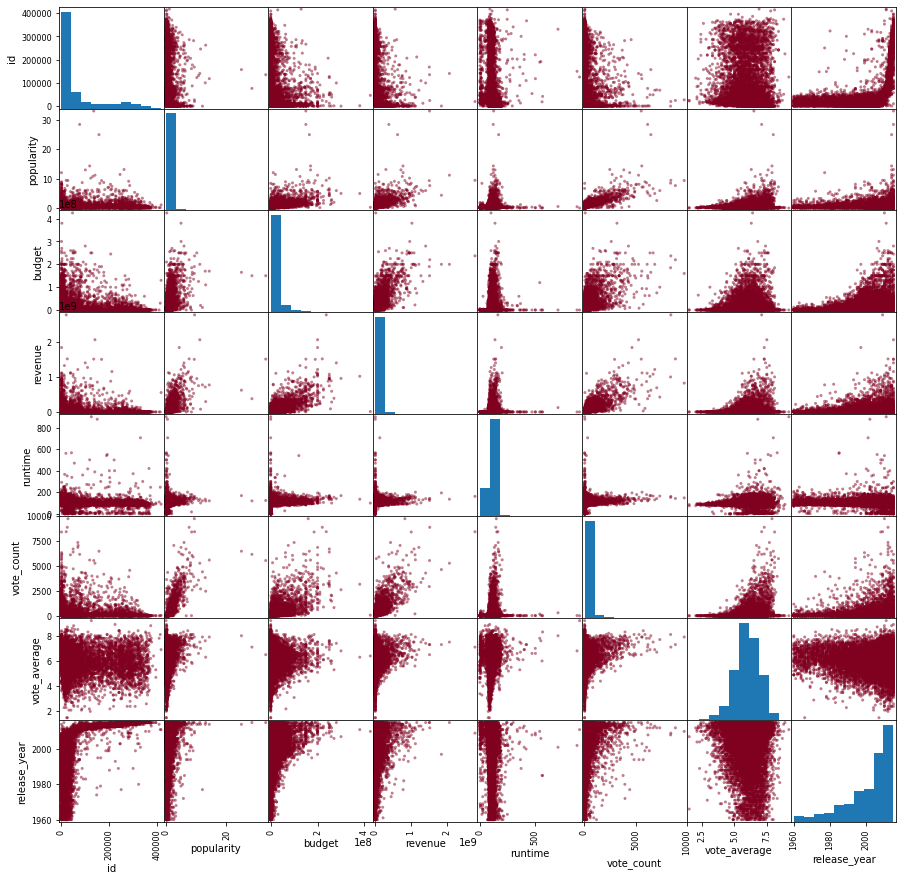

In [18]:
#overview of the numerical values in the entire dataframe
pd.plotting.scatter_matrix(df_movies,figsize = (15,15), c='#800020');

### 1. How many movies were released each year?

In [19]:
#group years into categories
bin_edges=[1960,1970,1980,1990, 2000, 2010, 2020]
bin_names= ['Sixties', 'Seventies', 'Eighties', 'Nineties', 'Noughties', 'Teenies']
df_movies['year_groups'] = pd.cut(df_movies['release_year'], bin_edges, labels=bin_names, right = False)

In [20]:
#group number of movies released by year groups
year_groups= df_movies.groupby('year_groups')

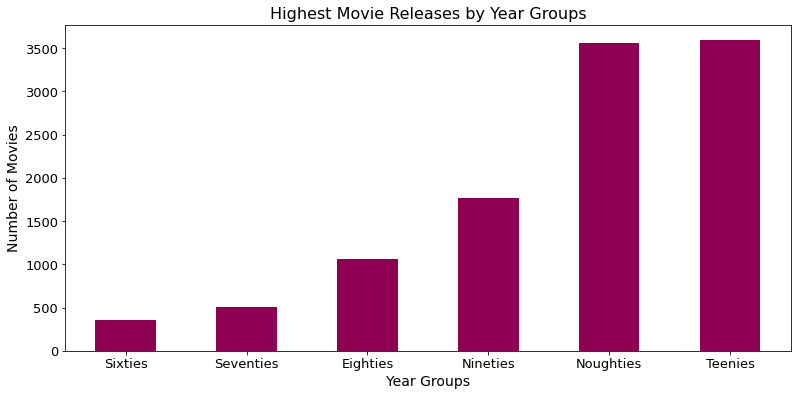

In [21]:
#Plot bar chart and label the plot axes and title
year_groups.size().plot(kind= 'bar', rot = 0, figsize = (13,6), fontsize=13,colormap='PiYG')

plt.title("Highest Movie Releases by Year Groups",fontsize=16)
plt.xlabel("Year Groups",fontsize=14)
plt.ylabel("Number of Movies",fontsize=14);

>The **Noughties** and **Teenies** which is between the year 2000 and the year 2015 have the highest number of movies released.

In [22]:
#count the number of movies released by year and sort 
movies_year = df_movies['release_year'].value_counts().sort_index()

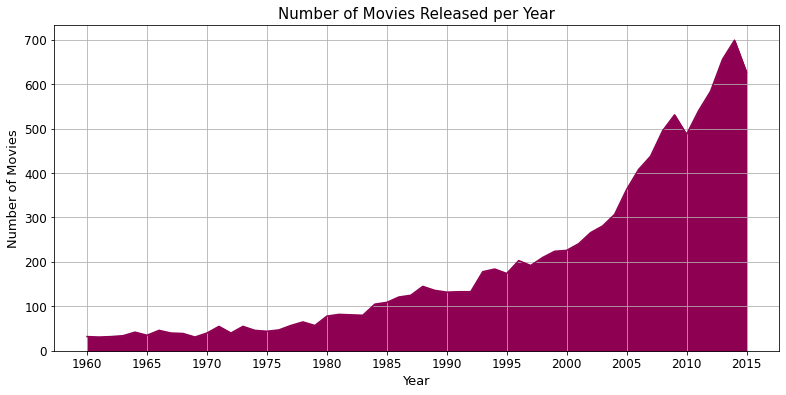

In [23]:
#plot area chart 
movies_year.plot(kind= 'area', figsize = (13,6),fontsize=12, xticks = np.arange(1960,2020,5), colormap='PiYG', grid = True)

#label the plot axes and title
plt.title("Number of Movies Released per Year",fontsize=15)
plt.xlabel('Year',fontsize=13)
plt.ylabel("Number of Movies",fontsize= 13);

>In the past decades there has been a tremendous increase in the number of movies released every year from 1960 to 2015. The year **2014** had the highest number of movies released with **700** movies and **1960** had the lowest number of movies released.

### 2. What month has the highest number of movie release?

In [24]:
#extract the month from the release date in the dataframe
df_movies['month'] = df_movies['release_date'].dt.month_name().str[:3]

In [29]:
#groupby month
month_release= df_movies.groupby('month')

#order the months chronologically
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_movies['month'] = pd.Categorical(df_movies['month'], categories=months, ordered=True)

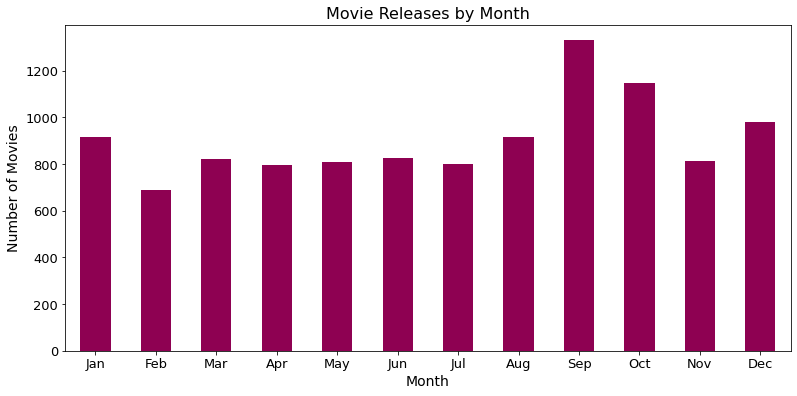

In [30]:
#Plot bar chart and label the plot axes and title
month_release.size().plot(kind= 'bar', rot = 0, figsize = (13,6), fontsize=13,colormap='PiYG')

plt.title("Movie Releases by Month",fontsize=16)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Number of Movies",fontsize=14);

> The month of **September** has the highest number of movie release followed by the month of October.

### 3. What are the most common genre of movies?

In [31]:
#define a function that will split and count each genre
def count_genres(x):
    
    #concatenate all rows of the genre in the dataframe
    all_genre = df_movies[x].str.cat(sep = '|')
    genre = pd.Series(all_genre.split('|'))
    
    #count each genre and sort in ascending order
    genre_count = genre.value_counts(ascending=True)
    return genre_count

In [32]:
#call the function to count the movies of each genre
total_genre = count_genres('genres')

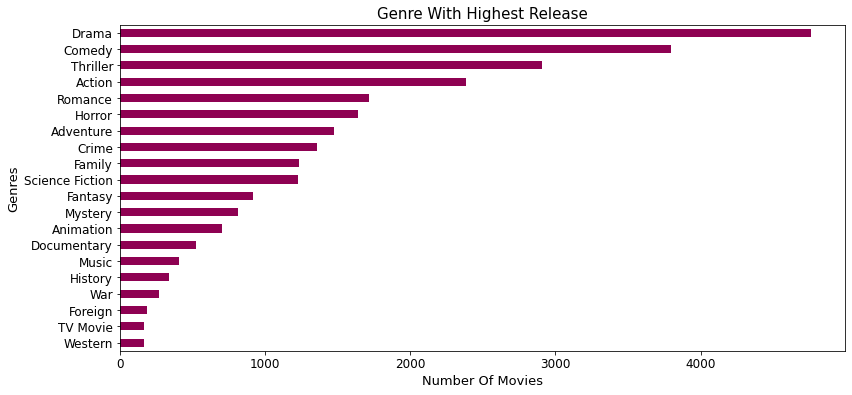

In [33]:
#plot horizontal bar chart
total_genre.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG', grid= False)

#label the plot axes and title
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13);

> The most common genre of movies are **Drama**, **Comedy**, **Thriller**, **Action** and **Romance**.

### 4. Who are the most featured actors in a movie?

In [34]:
#define a function that will split and count all actors
def count_actors(x):
    
    #concatenate all rows of the actors
    all_actors = df_movies[x].str.cat(sep = '|')
    actor = pd.Series(all_actors.split('|'))
    
    #count each actor
    actor_count = actor.value_counts()
    return actor_count

In [35]:
#call the function to count the actors and return the top 15 actors
total_actor_movies = count_actors('cast').nlargest(n=15).sort_values()

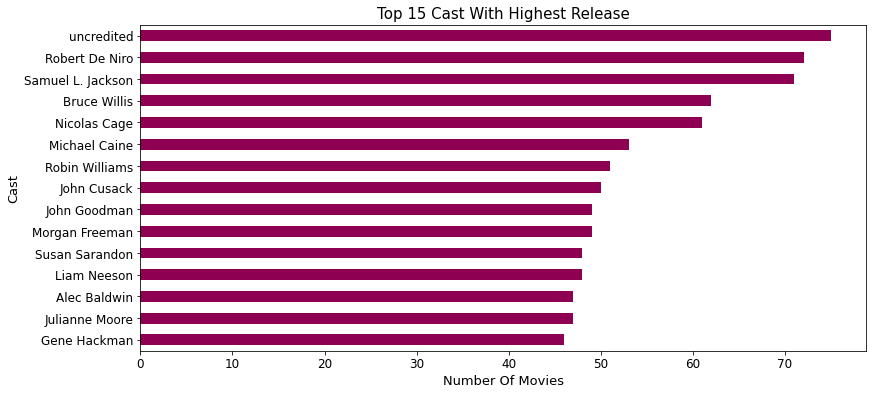

In [36]:
#plot horizontal bar chart
total_actor_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG')

#label the plot axes and title
plt.title("Top 15 Cast With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Cast",fontsize= 13);

> The top 5 most featured actors in a movie are **Robert De Niro**, **Samuel L. Jackson**, **Bruce Willis**, **Nicholas Cage** and **Michael Caine**.

### 5. Who are the Top 10 directors with the highest number of movies released?

In [37]:
#define a function that will split and count all directors
def count_directors(x):
    
    #concatenate all the rows of the directors
    all_director = df_movies[x].str.cat(sep = '|')
    director = pd.Series(all_director.split('|'))
    
    #count each of the director
    director_count = director.value_counts(ascending=False)
    return director_count

In [38]:
#call the function to count the directors and return the top 10
total_director_movies = count_directors('director').nlargest(n=10).sort_values()

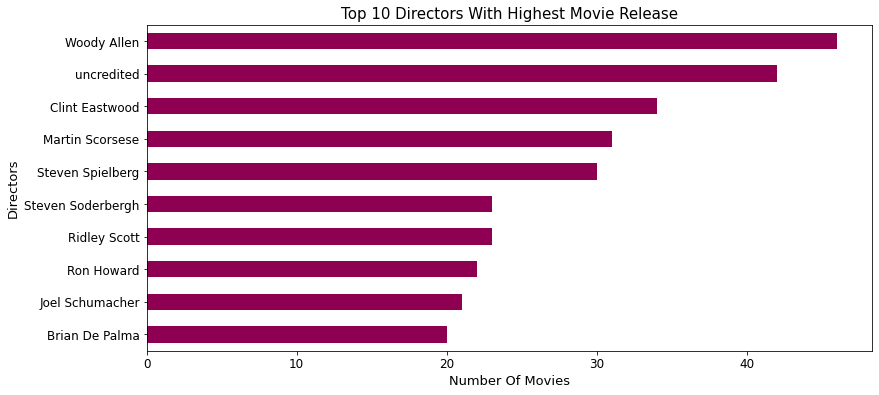

In [39]:
#plot horizontal bar chart
total_director_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG')

#label the plot axes and title
plt.title("Top 10 Directors With Highest Movie Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Directors",fontsize= 13);

> The top directors with the highest number of movies released are **Woody Allen**, **Clint Eastwood**, **Martin Scorsese**, and **Steven Spielberg**.

### 6. Top 10 production companies by number of movies produced?

In [40]:
#define a function that will split and count all production companies
def count_prod_companies(x):
    
    #concatenate all the rows of the production companies
    all_prod_companies = df_movies[x].str.cat(sep = '|')
    companies = pd.Series(all_prod_companies.split('|'))
    
    #count each of the production companies
    prod_count = companies.value_counts(ascending=True)
    return prod_count

In [41]:
#call the function to count the production companies and return top 10
total_prod_companies = count_prod_companies('production_companies').nlargest(n=10).sort_values()

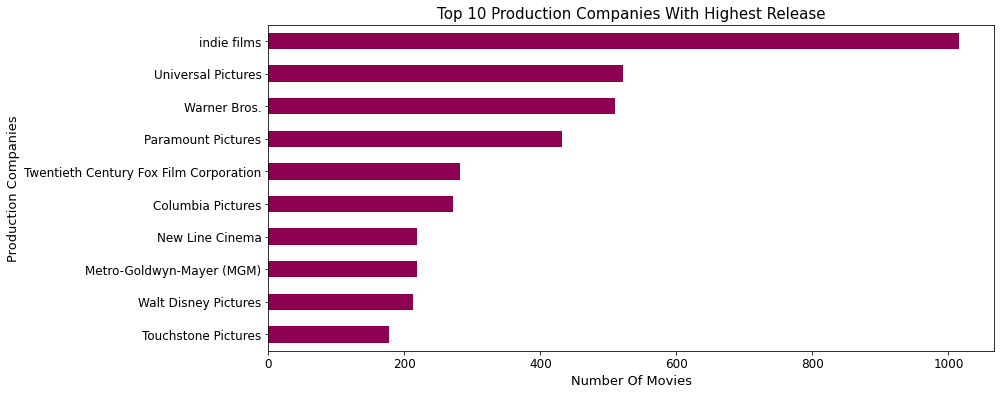

In [42]:
#plot horizontal bar chart
total_prod_companies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG')

#label the plot axes and title
plt.title("Top 10 Production Companies With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Production Companies",fontsize= 13);

> The major production companies with the highest number of movies produced are **Universal Pictures**, **Warner Bros.**, and **Paramount Pictures**.

### 7. Top 15 most popular movies?

In [43]:
#15 most popular movies by popularity
popular_movies= df_movies.groupby('original_title')['popularity'].max().nlargest(n=15).sort_values()

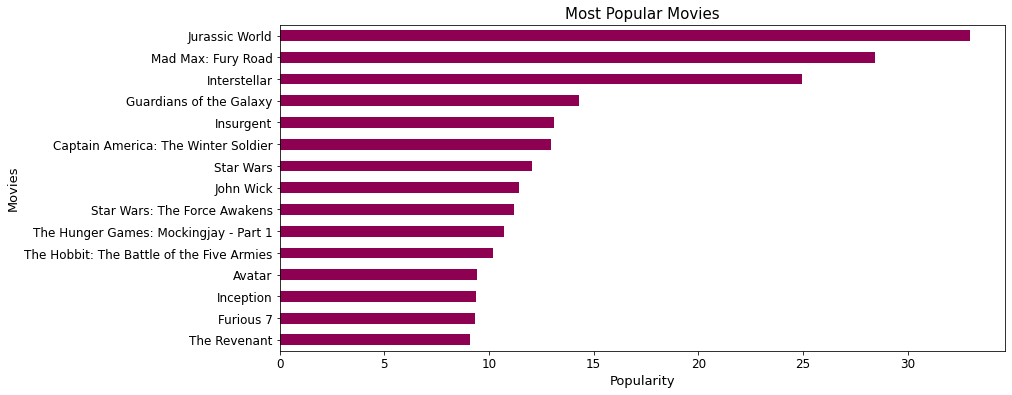

In [44]:
#plot horizontal bar chart
popular_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG')

#label the plot axes and title
plt.title("Most Popular Movies",fontsize=15)
plt.xlabel('Popularity',fontsize=13)
plt.ylabel("Movies",fontsize= 13);

> The most popular movies based on popularity are **Jurassic World**, **Mad Max: Fury Road** and **Interstellar**.

### 8. Does the release year of a movie determine it's popularity?

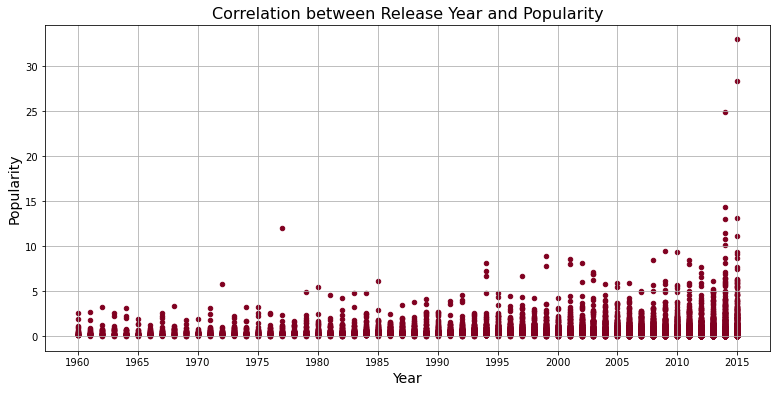

In [45]:
#plot a scatter chart to determine correlation
df_movies.plot(kind= 'scatter',x= 'release_year', y='popularity', figsize = (13,6), grid= True, xticks = np.arange(1960,2020,5), c='#800020')

#label the plot axes and title
plt.title("Correlation between Release Year and Popularity",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Popularity",fontsize=14);

> Based on the chart there is no correlation between the release year of a movie and the popularity of a movie. There are outliers that occurred in 1977 and 2015.

### 9. What month has the highest number of popular movies released? 

In [46]:
#group the movies by month based on popularity
month_popular= df_movies.groupby('month')['popularity'].mean()

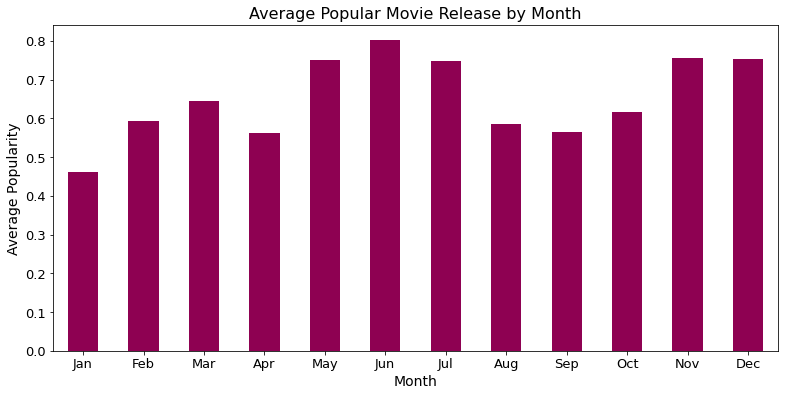

In [47]:
#plot bar chart
month_popular.plot(kind= 'bar', rot = 0, figsize = (13,6), fontsize=13,colormap='PiYG')

#label the plot axes and title
plt.title("Average Popular Movie Release by Month",fontsize=16)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Average Popularity",fontsize=14);

> The month of **June** and **November** has the highest number of popular movies released.

### 10. What movies are the most voted?

In [48]:
#10 most voted movies by highest vote count
voted_movies= df_movies.groupby('original_title')['vote_count'].max().nlargest(n=10).sort_values()

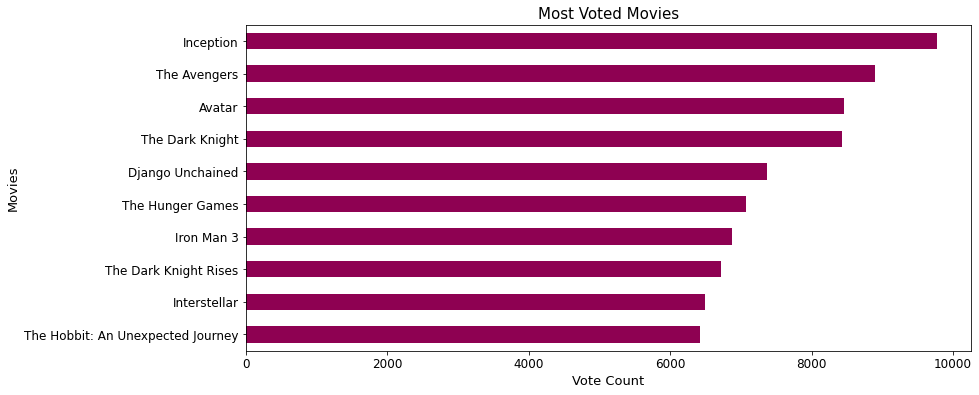

In [49]:
#plot horizontal bar chart
voted_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG')

#label the title and plot axes
plt.title("Most Voted Movies",fontsize=15)
plt.xlabel("Vote Count",fontsize=13)
plt.ylabel("Movies",fontsize= 13);

> **Inception**, **The Avengers**, **Avatar**, and **The Dark Knight** are the most voted movies by highest number of vote count.

### 11. What feature makes the movies most voted?

In [50]:
#group movies with the highest vote count by runtime
voted_movies= df_movies.groupby('runtime')['vote_count'].max().sort_index()

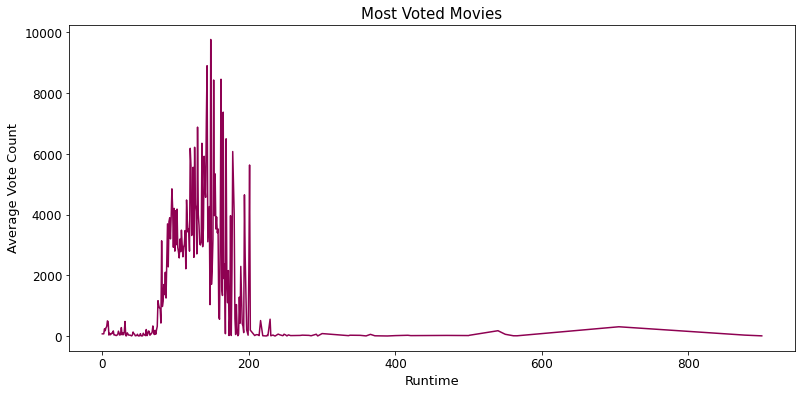

In [51]:
#plot line chart
voted_movies.plot(kind= 'line',figsize = (13,6),fontsize=12,colormap='PiYG')

#setup the title and the labels of the plot.
plt.title("Most Voted Movies",fontsize=15)
plt.xlabel('Runtime',fontsize=13)
plt.ylabel("Average Vote Count",fontsize= 13);

>Movies with the highest number of vote count are usually over two hours long in runtime but lesser than three hours thirty minutes.

### 12. What are the top 10 high-budget movies?

In [52]:
#maximum budget
df_movies['budget'].max()

425000000

In [53]:
#group budget by movie title
budget= df_movies.groupby('original_title')['budget'].max().nlargest(n=10).sort_values()

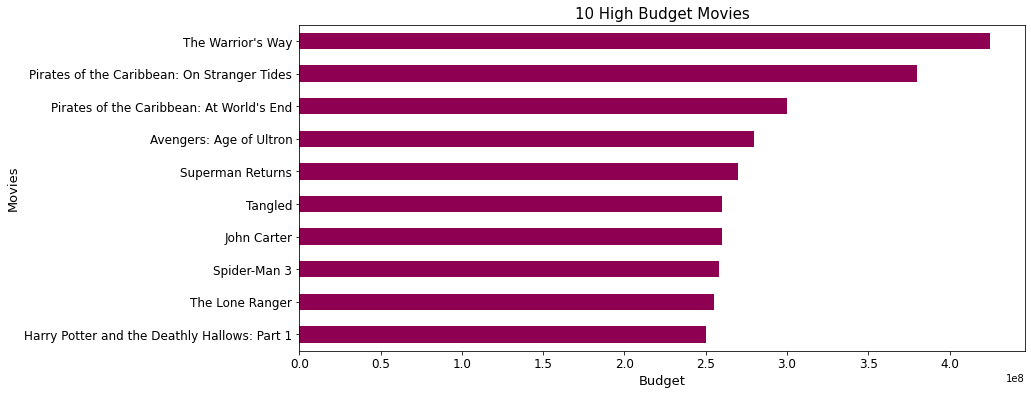

In [54]:
#plot chart using the budget function
budget.plot(kind= 'barh', figsize = (13,6),fontsize=12,colormap='PiYG')

#label the title and plot axes
plt.title("10 High Budget Movies",fontsize=15)
plt.xlabel("Budget",fontsize=13)
plt.ylabel("Movies",fontsize= 13);

> Movies with the highest budget are **The Warrior's Way**, **Pirates of the Caribbean** and **Avengers: Age of Ultron**.

### 13. What are the top 15 most profitable movies?

In [55]:
#calculate the profit
df_movies['profit']= df_movies['revenue'] - df_movies['budget']

In [56]:
#group profit by movie title
profitable_movies= df_movies.groupby('original_title')['profit'].mean().nlargest(n=15).sort_values()

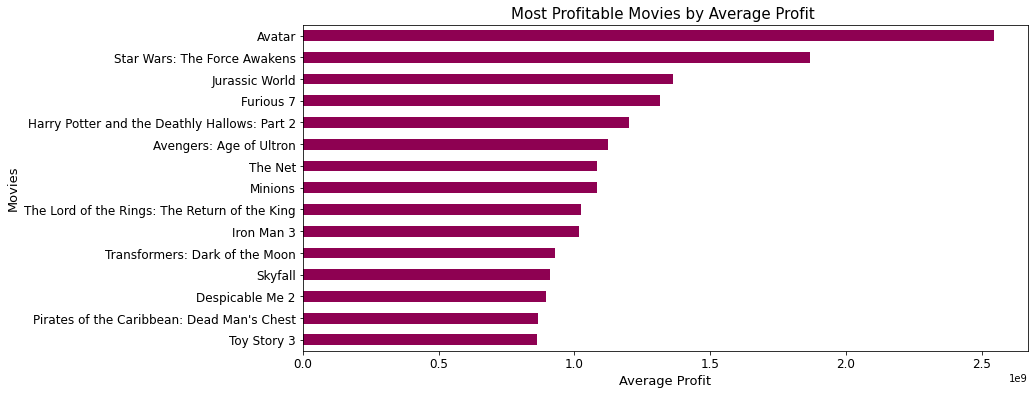

In [57]:
#plot horizontal bar chart
profitable_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG')

#label the title and plot axes
plt.title("Most Profitable Movies by Average Profit ",fontsize=15)
plt.xlabel('Average Profit',fontsize=13)
plt.ylabel("Movies",fontsize= 13);

> The most profitable movies are **Avatar**, **Star Wars: The Force Awakens**, **Jurassic World** and **Furious 7**.

### 14. How much profit was generated yearly against the budget?

In [58]:
#Budget against the profit generated per year
profit= df_movies.groupby('release_year')['profit'].sum()
budget = df_movies.groupby('release_year')['budget'].sum()

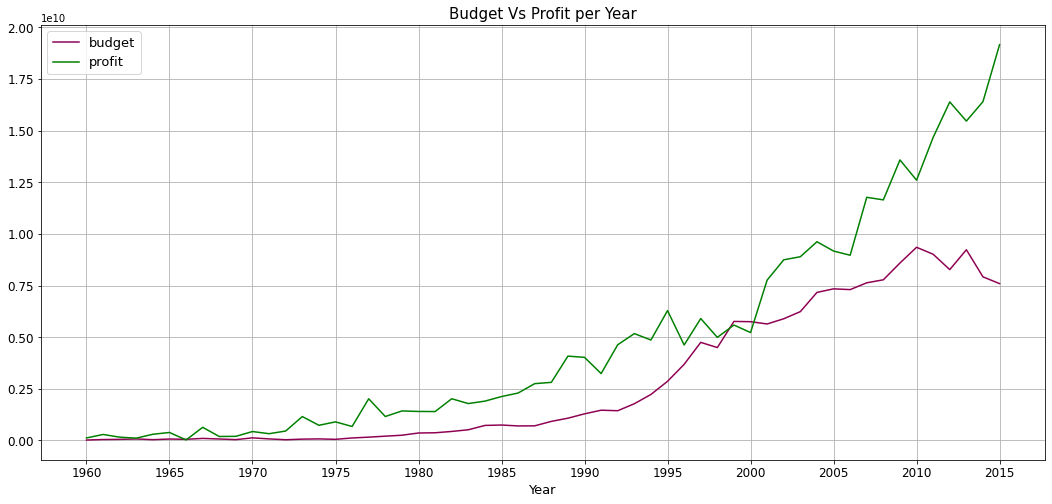

In [59]:
#plot line chart
budget.plot(kind= 'line', figsize = (18,8),fontsize=12, xticks = np.arange(1960,2020,5), colormap='PiYG')
profit.plot(kind= 'line', figsize = (18,8),fontsize=12, color ='green', grid= True)

#label the title and plot axes
plt.title("Budget Vs Profit per Year",fontsize=15)
plt.xlabel('Year',fontsize=13)
plt.legend(fontsize=13);

> The year **2015** generated the highest profit. In the year **2000**, the amount budgeted for movies was greater than the profit generated.

### 15. Over the years what month generated the most profit?

In [60]:
#group the profit generated by month
month_profit= df_movies.groupby('month')['profit'].sum()

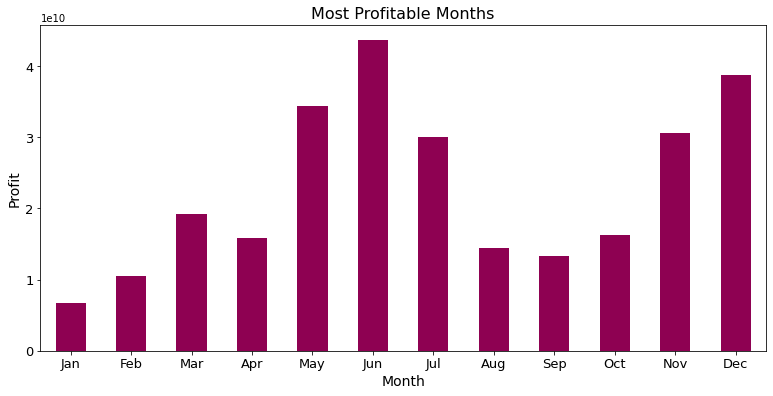

In [61]:
#plot bar chart
month_profit.plot(kind= 'bar', rot = 0, figsize = (13,6), fontsize=13,colormap='PiYG')

#label the plot axes and title
plt.title("Most Profitable Months",fontsize=16)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Profit",fontsize=14);

> The months **June**, **December** and **May** are the most profitable months to release movies.

### 16. What movies have the longest runtime?

In [62]:
#longest movies by Runtime
lengthy_movies= df_movies.groupby('original_title')['runtime'].max().nlargest(n=5).sort_values()

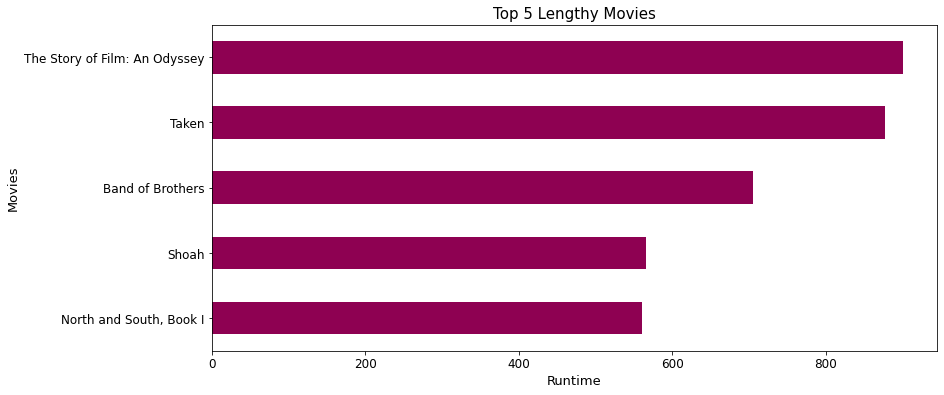

In [63]:
#plot chart
lengthy_movies.plot(kind= 'barh', figsize = (13,6),fontsize=12,colormap='PiYG')

#label the plot axes and title
plt.title("Top 5 Lengthy Movies",fontsize=15)
plt.xlabel('Runtime',fontsize=13)
plt.ylabel("Movies",fontsize= 13);

<a id='conclusions'></a>
## Conclusion

In the first section, I examined the number of movies released each year in the past decades and further analysed the month with the highest number of movie release. This led to an analysis on whether the 'release_year' of a movie is a determining factor in the 'popularity' of a movie. Based on my findings, there is no correlation between these two values. 

After that I analyzed movies with the highest number of 'vote_count'. I further analyzed a feature that could have contributed to the high number of 'vote_count'. I discovered that movies with higher vote counts then to be over two hours long in runtime but lesser than three hours thirty minutes. While movies with over three hours thirty minutes in runtime tend to have the least number of votes.



## Limitations
After the exploration of The Movie Database (TMDB) dataset, I could not find any correlation between the 'release_year' of a movie and the 'popularity'. From the summary statistics of the 'popularity' there is a massive variance between the minimum and maximum value. More information about the criteria used to determine the popularity of a movie could have provided more insight for further exploration.

Another limitation was the zero values for the 'budget' and 'revenue' of movies. Replacing these values with the average values would distort the analysis as there was over four thousand zero values for both variables.

<a id='resources'></a>
## Resources

<ol>
<li>https://www.kaggle.com/code/deepak525/investigate-tmdb-movie-dataset/notebook</li>
<li>https://medium.com/my-data-camp-journey/investigating-tmdb-movie-datasets-4ee04c263915</li>
<li>https://holypython.com/python-visualization-tutorial/colors-with-python/#:~:text=Colormaps%20are%20collections%20of%20colors%20that%20are%20used,colormap%20to%20the%20values%20in%20the%20whole%20plot</li>
<li>Stack Overflow</li>
<li>https://www.datacamp.com/tutorial/wordcloud-python</li>
<li>Pandas Documentation</li>
<li>Matplotlib Documentation</li>
</ol>